In [1]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read 'box.csv'
df_box = pd.read_csv("C:/Users/User/Downloads/boxes.csv")
df_box.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96


In [3]:
# read 'purchase.csv'
df_purch = pd.read_csv("C:/Users/User/Downloads/purchase.csv")
df_purch.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0


In [4]:
# merge them together in main df
df = pd.merge(left=df_purch, right=df_box, on='BOX_ID',how='outer')

In [5]:
df.head()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1/2/2019,2CED678A247,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
1,1/2/2019,2BF58D91BA1,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2,1/2/2019,2C3A3F7DB65,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
3,1/2/2019,2BD2641961A,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
4,1/2/2019,2BD2EAA1C90,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98


In [6]:
df.tail()

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
2455859,14/10/2018,2BE6A6A7E6C,169.0,1.0,Premium,Delivery from Collection Point,14.0,2.9,23.98
2455860,14/10/2018,2C774DAC048,169.0,1.0,Premium,Delivery from Collection Point,14.0,2.9,23.98
2455861,14/10/2018,2BD1A4A1DC5,169.0,1.0,Premium,Delivery from Collection Point,14.0,2.9,23.98
2455862,13/10/2018,28D8EFAE836,264.0,2.0,Standard,Delivery from Collection Point,13.0,2.2,17.98
2455863,31/10/2018,2C7754E946E,109.0,2.0,Premium,Delivery from Collection Point,0.0,4.2,15.96


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2455864 entries, 0 to 2455863
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PURCHASE_DATE    object 
 1   MAGIC_KEY        object 
 2   BOX_ID           float64
 3   BOX_COUNT        float64
 4   QUALITY          object 
 5   DELIVERY_OPTION  object 
 6   MILK             float64
 7   MEAT             float64
 8   UNIT_PRICE       float64
dtypes: float64(5), object(4)
memory usage: 187.4+ MB


## EDA

**4.How many records have missing information?**

In [8]:
# number of missing values
print("Number of missing info:")
df.isnull().sum().sum()

Number of missing info:


414

**5.How many records are invalid?**

In [9]:
# number of invalid record
print("Number of Invalid Records:")
df[(df["BOX_ID"] >290) | (df["BOX_COUNT"] < 1)].shape[0]

Number of Invalid Records:


17

In [10]:
# dropping misssing values and invalid records
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

77

In [12]:
# dropping duplicated values
df.drop_duplicates(inplace=True)

# converting type of 'PURCHASE_DATE' to date time
df["PURCHASE_DATE"]= pd.to_datetime(df["PURCHASE_DATE"])
# set 'PURCHASE_DATE' as index
df.set_index("PURCHASE_DATE",drop=True,inplace=True)
df.sort_index(inplace=True)
# converting float to int
df["BOX_ID"] = df["BOX_ID"].astype(int)
df["BOX_COUNT"] = df["BOX_COUNT"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2455723 entries, 2018-01-10 to 2019-12-02
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   MAGIC_KEY        object 
 1   BOX_ID           int32  
 2   BOX_COUNT        int32  
 3   QUALITY          object 
 4   DELIVERY_OPTION  object 
 5   MILK             float64
 6   MEAT             float64
 7   UNIT_PRICE       float64
dtypes: float64(3), int32(2), object(3)
memory usage: 149.9+ MB


**6.What is the monthly meat sales quantity for Feb'19?**

In [13]:
monthly_tot = df.resample(rule='M').sum()
monthly_tot

,BOX_ID,BOX_COUNT,MILK,MEAT,UNIT_PRICE
PURCHASE_DATE,,,,,
2018-01-31,7330416,46045,421765.3,87556.6,833064.16
2018-02-28,8226797,51611,483795.6,97229.9,934929.56
2018-03-31,6596914,42120,396203.8,79166.6,765991.42
2018-04-30,7611627,47554,445469.7,90600.3,860225.02
2018-05-31,7507118,46841,431821.1,89109.6,842006.10
2018-06-30,6921003,43758,398802.8,84599.5,787626.14
2018-07-31,7536986,47623,440842.2,91183.5,856537.30
2018-08-31,6855507,43507,395680.5,84406.1,785408.86
2018-09-30,7071248,46290,413457.9,88608.3,823253.90


In [14]:
feb_meat_quan = monthly_tot.loc['2019-02-28','MEAT']
print("Monthly meat sales quantity for Feb'19: ")
print(int(feb_meat_quan),"stones")

Monthly meat sales quantity for Feb'19: 
846602 stones


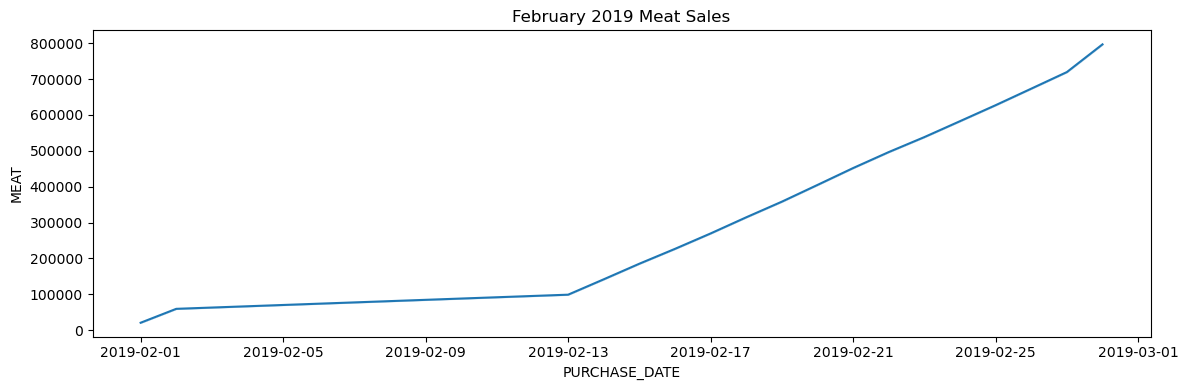

In [15]:
# axis values for graph
index = df.loc['2019-02-01':'2019-02-28'].index
meat_sold = df.loc['2019-02-01':'2019-02-28']["MEAT"]
plt.figure(figsize=(12,4))
# plotting  graph
sns.lineplot(x=index,y=meat_sold.cumsum())
plt.title("February 2019 Total Meat Sales")
plt.tight_layout();

**7.What is the Month-on-Month meat sales amount growth% on average?**

In [16]:
# monthly meat sells
sells_growth =monthly_tot['MEAT'].pct_change()*100
print('Month-on-Month meat sales amount growth% on average:')
print(round(sells_growth.mean(),2),'percent')

Month-on-Month meat sales amount growth% on average:
22.47 percent


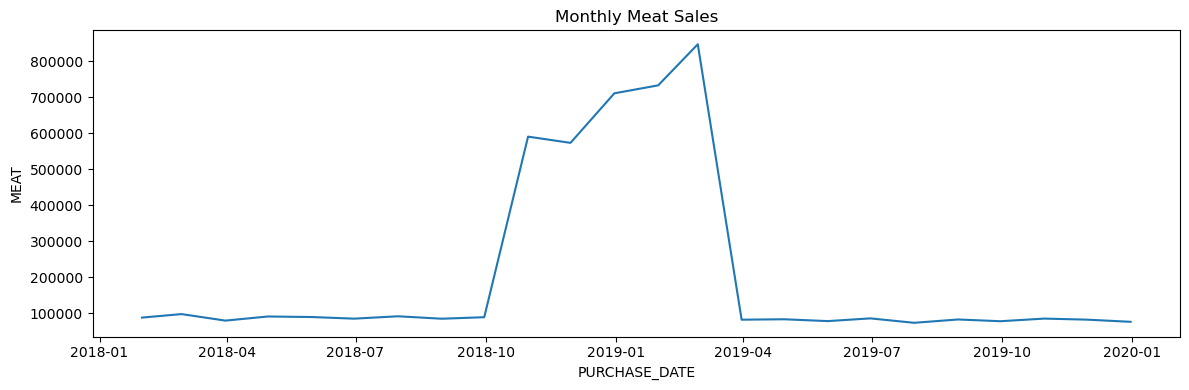

In [17]:
index = monthly_tot.index
meat_sold = monthly_tot.loc['2018-01-31':'2019-12-31']["MEAT"]
plt.figure(figsize=(12,4))
# plotting  graph
sns.lineplot(x=index,y=meat_sold,markers='*')
plt.title("Monthly Meat Sales")
plt.tight_layout();

**8.What is the difference between Daily avg. Milk sale amount on Sunday & Tuesday for the month of Jan’19?**

In [18]:
# subsetting data for Jan’19
jan_19_data = df[(df.index.year == 2019) & (df.index.month == 1)]
# get day names
day_names = jan_19_data.index.day_name()
# avrage sales
average_sales_by_day = jan_19_data.groupby(day_names)['MILK'].mean()
average_sales_by_day

PURCHASE_DATE
Friday       8.097331
Monday       8.014505
Saturday     7.485140
Sunday       8.005976
Thursday     8.083397
Tuesday      8.056491
Wednesday    8.129512
Name: MILK, dtype: float64

No difference between Daily avg. Milk sale amount on Sunday & Tuesday for the month of Jan’19.**

**9.What is the Top selling Premium quality Box ID for the month of Nov'18?**

In [19]:
mask_yr = (df.index.year==2018)
mask_month = (df.index.month==11)
mask_qual = (df["QUALITY"]=="Premium")
# subset by november 18 premium box 
prem_nov_18_data = df[mask_yr & mask_month & mask_qual]
top_prem_nov_18_box = (prem_nov_18_data
                        .groupby(prem_nov_18_data['BOX_ID'])
                        ['BOX_COUNT']
                        .sum()
                        .sort_values(ascending=False))
# Top 5 selling Premium quality Box ID's for the month of Nov'18
top_prem_nov_18_box.head()

BOX_ID
163    57983
143    39320
89     16553
134    11706
137     8121
Name: BOX_COUNT, dtype: int32

**163** is the Top selling Premium quality Box ID for the month of Nov'18

**10.What is the unit price of the third highest sold box for Dec’18?**

In [20]:
mask_yr = (df.index.year==2018)
mask_month = (df.index.month==12)
# subset by december 18
dec_18_data = df[mask_yr & mask_month]
top_dec_18_box = (dec_18_data
                    .groupby(dec_18_data['BOX_ID'])
                    ['BOX_COUNT']
                    .sum()
                    .sort_values(ascending=False))
# Top 5 selling  Box ID's for the month of Dec'18
top_dec_18_box.head()

BOX_ID
163    48218
143    26219
103    18118
255    17454
89     16891
Name: BOX_COUNT, dtype: int32

**103** is the third highest sold Box ID for the month of Dec'18

In [21]:
df_box[df_box['BOX_ID'] == 103]

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
102,103,Premium,Delivery from Collection Point,0.0,4.0,15.96


**15.96** is the unit price of the third highest sold box for Dec’18

## Prediction

In [22]:
# problem dataset
df_prob = pd.read_csv("C:/Users/User/Downloads/problem 1.csv")
df_prob.head()

,MAGIC_KEY
0,28D5BB06356
1,293BEAB4E98
2,2962EE8065C
3,2957BE29EA9
4,28E351A0745


In [23]:
# subsetting df by  first 15 days of March-2019
mar_15_19 = df.loc['2019-03-01':'2019-03-16',:]
mar_15_19.shape

(38703, 8)

In [24]:
# intersect  first 15 days of March-2019 MAGIC_KEY and problem data MAGIC_KEY
common_keys = set(mar_15_19['MAGIC_KEY']).intersection(set(df_prob['MAGIC_KEY']))
common_keys = list(common_keys)    # make list of common_keys

# cross check first 15 days of March-2019 magic keys and common keys
prediction = []
for i in range(0,58689):
    pred = df_prob.iloc[i].values in common_keys
    prediction.append(pred)

df_prob['PURCHASE'] = prediction
df_prob['PURCHASE'] = df_prob['PURCHASE'].apply(lambda x:'Y' if x==True else 'N')

df_prob.head()

,MAGIC_KEY,PURCHASE
0,28D5BB06356,N
1,293BEAB4E98,N
2,2962EE8065C,N
3,2957BE29EA9,Y
4,28E351A0745,N


In [25]:
df_prob.to_csv('submission.csv', index=False)